In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import equalize, otsu
from skimage.morphology import ball

import napari
%gui qt

In [5]:
def normalize_pixels(i):
    i = 256*(i/np.amax(i))
    return i.astype(np.uint8)

In [6]:
im = io.imread("classic.tif")

In [7]:
np.amin(im)

11463

In [8]:
viewer = napari.view_image(im)

In [9]:
im.shape

(11, 101, 101)

In [12]:
otsu_im = otsu(im, ball(20))

ValueError: The parameter `image` must be a 2-dimensional array

In [6]:
equalized_im = equalized_im - np.amin(equalized_im)

In [7]:
equalized_im = normalize_pixels(equalized_im)

In [8]:
viewer = napari.view_image(equalized_im)

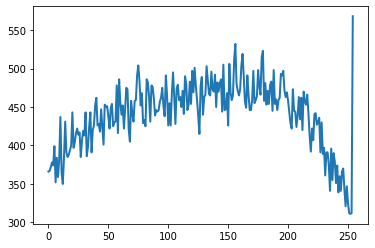

In [9]:
hist = np.histogram(equalized_im, bins=np.arange(0, 256))

plt.figure(1)
plt.plot(hist[1][:-1], hist[0], lw = 2)

In [10]:
thresholded = equalized_im > 200

In [11]:
viewer = napari.view_image(thresholded)

In [14]:
from skimage.morphology import remove_small_objects

In [15]:
thresholded_filtered = remove_small_objects(thresholded, min_size = 60)

In [16]:
viewer = napari.view_image(thresholded_filtered)